## Adidas sales prediction (time series)##
Bu uygulamada Adidas markasına ait satış verileri zeründen geleceğe yönelik satış tahmini yapılacaktır

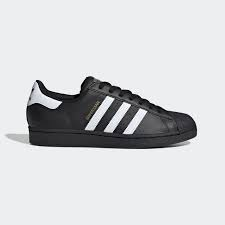

In [1]:
#Kütüphaneleri yükle-içe aktarma
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Sezonluk inceleme, arima modeli ile tahmin
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [3]:
#veri setini yükle
df=pd.read_csv('adidas-quarterly-sales.csv')
df

,Time Period,Revenue
0,2000Q1,1517
1,2000Q2,1248
2,2000Q3,1677
3,2000Q4,1393
4,2001Q1,1558
...,...,...
83,2020Q4,5142
84,2021Q1,5268
85,2021Q2,5077
86,2021Q3,5752


In [5]:
#interakitif veri görseleştirme
import plotly.express as px
fig=px.line(df,x='Time Period',y='Revenue', markers=True)
fig.show()

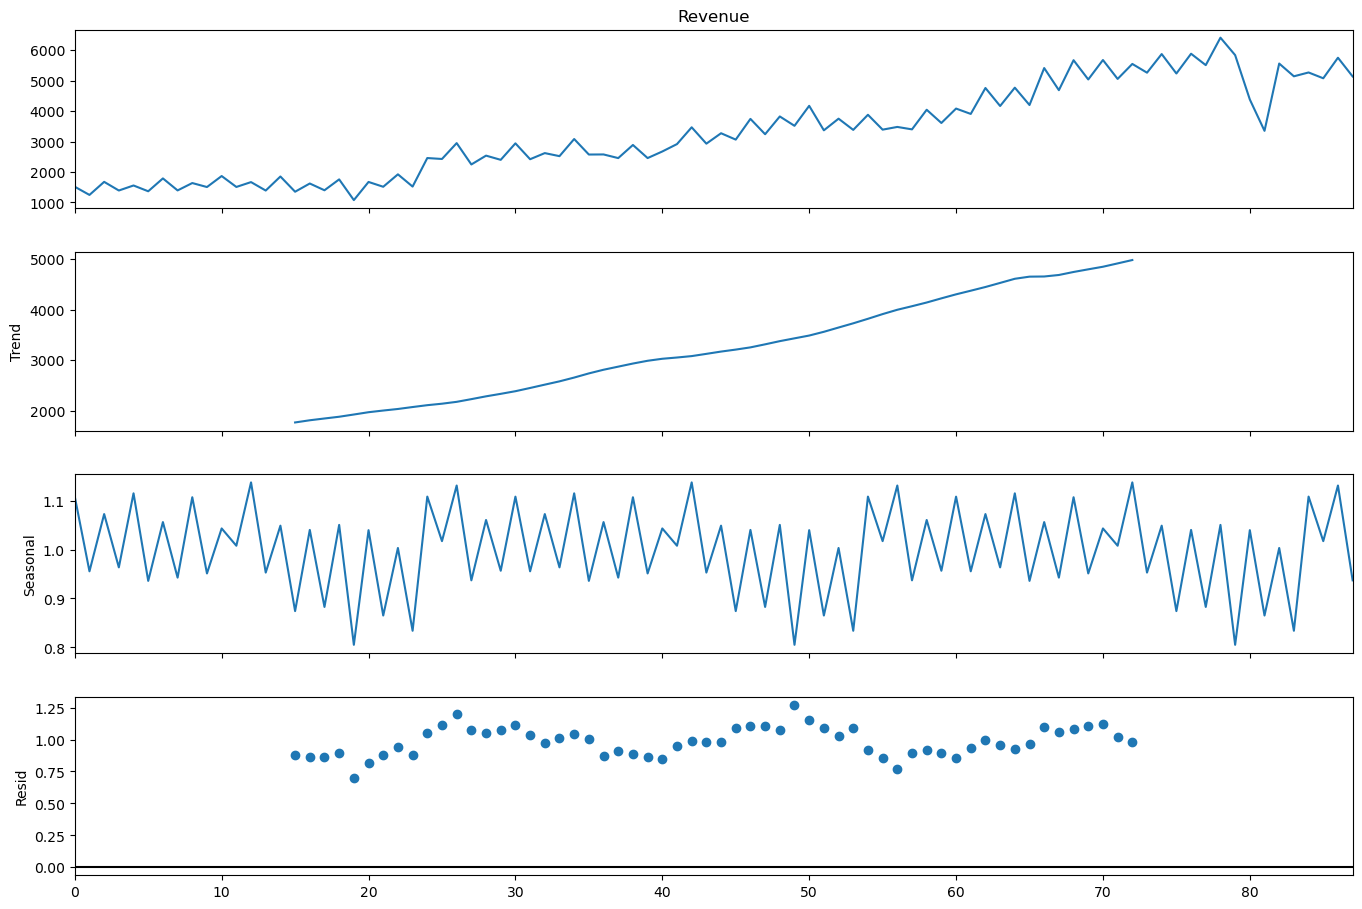

In [6]:
result=seasonal_decompose(df['Revenue'],model='multiplicative',period=30)
fig=result.plot()
fig.set_size_inches(15,10)
fig.show()

Zaman Serisi Grafiği Unsurları
Trend: Zaman serisinin genel eğilimi. Veriler zaman içinde artıyor mu, azalıyor mu, yoksa sabit mi kalıyor? Örneğin, bir şirketin yıllık satış gelirlerini gösteren bir zaman serisi grafiğinde, trend yukarı doğru ise satışlar artıyor demektir.

Mevsimsellik: Belirli zaman dilimlerinde tekrarlayan desenler. Örneğin, mevsimlik etkiler veya aylık değişiklikler olabilir. Bu, satışların her yıl belirli aylarda artıp azaldığı bir grafik olabilir.

Düzensizlik (Noise): Veri üzerinde rastgele dalgalanmalar. Bu, veri toplamada hatalar veya beklenmeyen olaylar gibi faktörlerden kaynaklanabilir.

Dönemsel Dalgalanmalar (Cyclic Patterns): Mevsimsellikten farklı olarak, daha uzun süreli dalgalanmalar olabilir. Örneğin, ekonomik döngüler veya uzun vadeli piyasa trendleri.

Grafiğin Yorumu
Grafikteki unsurlara göre şu adımları izleyerek yorum yapabiliriz:

Trend Analizi:

Veriler zaman içinde sürekli olarak artıyor mu, azalıyor mu, yoksa sabit mi kalıyor? Grafikte belirgin bir artış veya azalma trendi varsa, bu trendin nedenlerine odaklanmak faydalı olabilir.
Trendde bir kırılma noktası var mı? Örneğin, belirli bir tarihten sonra ani bir değişim mevcut mu?

Mevsimsellik Analizi:

Belirli aralıklarla tekrarlayan desenler var mı? Örneğin, her yıl aynı dönemde benzer artışlar veya azalışlar görülebilir.
Mevsimsel etkilerin büyüklüğü nedir? Bu etkiler belirgin mi yoksa hafif mi?
Düzensizlik ve Gürültü:

Veride çok fazla rastgele dalgalanma var mı? Eğer öyleyse, bu dalgalanmaların veri analizini nasıl etkilediğini göz önünde bulundurmak önemlidir.
Düzensizlikleri azaltmak için bir yöntem kullanıldı mı? Örneğin, hareketli ortalama gibi yöntemlerle bu etkiler giderilmiş olabilir.
Dönemsel Dalgalanmalar:

Uzun vadeli döngüler mevcut mu? Bu döngüler mevsimsel etkilerden daha uzun sürelidir ve ekonomik döngüler gibi faktörlerden kaynaklanabilir.

In [31]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Revenue'], order=(1, 1, 1),seasonal_order=(1, 1, 1, 4))
# 4 3 er aylık verielr üzeirnde çalıştığımız için 44*3=12 den 1 yıllık peryotlar halinde ele alınması için
#model=sm.tsa.statespace.SARIMAX(df['Revenue'])
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                           Revenue   No. Observations:                   88
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -600.455
Date:                           Tue, 11 Jun 2024   AIC                           1210.910
Time:                                   18:17:09   BIC                           1223.004
Sample:                                        0   HQIC                          1215.769
                                            - 88                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7204      0.041     17.508      0.000       0.640       0.801
ma.L1         -1.0000      0.081    -12.304

In [32]:
y_pred=model.predict(start=len(df),end=len(df)+20)

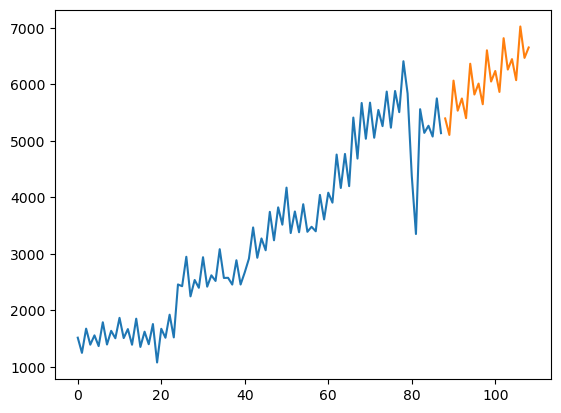

In [33]:
df['Revenue'].plot()
y_pred.plot()
plt.show()

In [16]:
#Corona olmasaydı
df_without_corono=pd.DataFrame(df['Revenue'][:75],columns=['Revenue'])
df_without_corono

,Revenue
0,1517
1,1248
2,1677
3,1393
4,1558
...,...
70,5677
71,5056
72,5548
73,5261


In [20]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df_without_corono['Revenue'], order=(1, 1, 1),seasonal_order=(1, 1, 1, 4))
# 4 3 er aylık verielr üzeirnde çalıştığımız için 44*3=12 den 1 yıllık peryotlar halinde ele alınması için
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                           Revenue   No. Observations:                   75
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -464.801
Date:                           Tue, 11 Jun 2024   AIC                            939.603
Time:                                   18:12:46   BIC                            950.845
Sample:                                        0   HQIC                           944.068
                                            - 75                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8487      0.184     -4.609      0.000      -1.210      -0.488
ma.L1          0.5914      0.245      2.411

In [27]:
preedictions=model.predict(start=len(df_without_corono),end=len(df_without_corono)+20)
print(preedictions)

75    5312.441958
76    5737.496709
77    5496.247653
78    6082.093938
79    5543.946548
80    5945.935913
81    5721.401579
82    6296.339078
83    5767.505241
84    6160.544358
85    5942.866429
86    6512.832144
87    5988.232117
88    6377.407643
89    6162.817494
90    6730.381669
91    6207.823500
92    6595.196218
93    6382.086656
94    6948.450901
95    6426.912053
Name: predicted_mean, dtype: float64


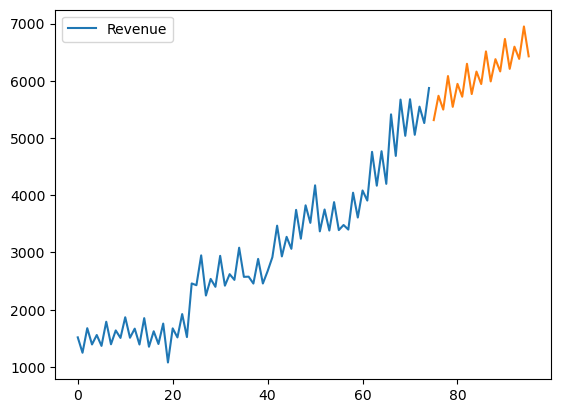

In [22]:
df_without_corono.plot()
preedictions.plot()
plt.show()